In [1]:
import math                          #for math formula
import numpy as np                   # for multi-dimentional error
import pandas as pd                  # for tables
import scipy                         #for scientific calulator
import statsmodels.api as sm         #for statistics
import matplotlib.pyplot as plt             # graphs
import seaborn as sns                #for attractive graphs
sns.set() 

In [2]:
import sys
sys.setrecursionlimit(1500)

In [3]:
df=pd.read_csv('train.csv/train.csv')
df# quoting=to remove the double quotes

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [6]:
df['severe_toxic'].value_counts()

0    157976
1      1595
Name: severe_toxic, dtype: int64

In [7]:
df['obscene'].value_counts()

0    151122
1      8449
Name: obscene, dtype: int64

In [8]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [9]:
df['insult'].value_counts()

0    151694
1      7877
Name: insult, dtype: int64

In [10]:
df['identity_hate'].value_counts()

0    158166
1      1405
Name: identity_hate, dtype: int64

In [11]:
#we will take comment_text and toxic to do prediction.
#lets do preprocessing 

In [12]:
comment=df['comment_text']
comment

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [13]:
toxic=df['toxic'].values

In [14]:
toxic

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
comment1=df['comment_text'][1]
comment1

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [16]:
import re
comment1=re.sub('[^a-zA-Z]',' ',df['comment_text'][1])
comment1=comment1.lower()
comment1

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk         january           utc '

In [17]:
comment1=comment1.split()


In [18]:
comment1

['d',
 'aww',
 'he',
 'matches',
 'this',
 'background',
 'colour',
 'i',
 'm',
 'seemingly',
 'stuck',
 'with',
 'thanks',
 'talk',
 'january',
 'utc']

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
comment1=[ps.stem(word) for word in comment1 if not word in set(stopwords.words('english'))]
comment1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aww',
 'match',
 'background',
 'colour',
 'seemingli',
 'stuck',
 'thank',
 'talk',
 'januari',
 'utc']

In [20]:
comment1=' '.join(comment1)
comment1

'aww match background colour seemingli stuck thank talk januari utc'

In [21]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,10000):
    comment1=re.sub('[^a-zA-Z]',' ',df['comment_text'][i])
    comment1=comment1.lower()
    comment1=comment1.split()
    ps=PorterStemmer()
    comment1=[ps.stem(word) for word in comment1 if not word in set(stopwords.words('english'))]
    comment1=' '.join(comment1)
    corpus.append(comment1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus

['explan edit made usernam hardcor metallica fan revert vandal closur ga vote new york doll fac pleas remov templat talk page sinc retir',
 'aww match background colour seemingli stuck thank talk januari utc',
 'hey man realli tri edit war guy constantli remov relev inform talk edit instead talk page seem care format actual info',
 'make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later one els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipedia good articl nomin transport',
 'sir hero chanc rememb page',
 'congratul well use tool well talk',
 'cocksuck piss around work',
 'vandal matt shirvington articl revert pleas ban',
 'sorri word nonsens offens anyway intend write anyth articl wow would jump vandal mere request encycloped one use school refer select breed page almost stub point anim breed short messi articl give in

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [24]:
len(x[0])


25107

In [25]:
x.shape


(10000, 25107)

In [26]:
y=toxic[:10000]


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred=classifier.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
CR=classification_report(y_test,y_pred)
print(cm)
print(ac)
print(CR)

[[1853  394]
 [ 134  119]]
0.7888
              precision    recall  f1-score   support

           0       0.93      0.82      0.88      2247
           1       0.23      0.47      0.31       253

    accuracy                           0.79      2500
   macro avg       0.58      0.65      0.59      2500
weighted avg       0.86      0.79      0.82      2500



In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier1.fit(x_train,y_train)
y_pred2=classifier1.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred2)
ac=accuracy_score(y_test,y_pred2)
CR=classification_report(y_test,y_pred2)
print(cm)
print(ac)
print(CR)

[[2170   77]
 [ 105  148]]
0.9272
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2247
           1       0.66      0.58      0.62       253

    accuracy                           0.93      2500
   macro avg       0.81      0.78      0.79      2500
weighted avg       0.92      0.93      0.93      2500



In [33]:
#Lets build our Third Model using support Vector algorithm
from sklearn.svm import SVC
classifier2=SVC(C=10,kernel='linear',random_state=0,probability=True)
classifier2.fit(x_train,y_train)
y_pred3=classifier2.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred3)
ac=accuracy_score(y_test,y_pred3)
CR=classification_report(y_test,y_pred3)
print(cm)
print(ac)
print(CR)

[[2185   62]
 [  92  161]]
0.9384
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2247
           1       0.72      0.64      0.68       253

    accuracy                           0.94      2500
   macro avg       0.84      0.80      0.82      2500
weighted avg       0.94      0.94      0.94      2500



In [35]:
Conclusion=pd.DataFrame({'model':['naive_bayes','RandomForest','SVC'],'Accuracy_Report':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)]})
Conclusion
#Support Vector

,model,Accuracy_Report
0,naive_bayes,0.7888
1,RandomForest,0.9272
2,SVC,0.9384


In [36]:
import pickle
filename = 'SVM_model50000.sav'
pickle.dump(classifier2, open(filename, 'wb'))

In [37]:
print("Done")

Done


In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [39]:
ns_probs = [0 for _ in range(len(y_test))]

In [40]:
nb_probs = classifier.predict_proba(x_test)
ds_probs=classifier1.predict_proba(x_test)
sv_probs=classifier2.predict_proba(x_test)

In [41]:
nb_probs=nb_probs[:,1]
ds_probs=ds_probs[:,1]
sv_probs=sv_probs[:,1]

In [42]:
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
ds_auc= roc_auc_score(y_test,ds_probs)
sv_auc= roc_auc_score(y_test,sv_probs)


In [43]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('naive: ROC AUC=%.3f' % (nb_auc))
print('DecisionTree: ROC AUC=%.3f' % (ds_auc))
print('Support Vector: ROC AUC=%.3f' %(sv_auc))

No Skill: ROC AUC=0.500
naive: ROC AUC=0.648
DecisionTree: ROC AUC=0.785
Support Vector: ROC AUC=0.916


In [44]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, nb_probs)
ds_fpr, ds_tpr, _=  roc_curve(y_test,ds_probs)
sv_fpr, sv_tpr, _=  roc_curve(y_test,sv_probs)

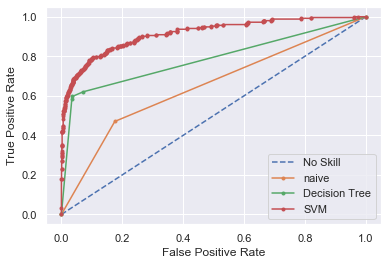

In [45]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='naive')
pyplot.plot(ds_fpr, ds_tpr, marker='.', label='Decision Tree')
pyplot.plot(sv_fpr, sv_tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()